In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Load the Data
The CSV file 'all_data.csv' contains data on GDP and life expectancy within different countries.

In [2]:
data = pd.read_csv('all_data.csv')
display(data.head())

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


This dataset contain 4 columns and 96 rows of data, there is no missing information. 

Type of data:
- 'Country' column - categorical variable
- 'Year' column - quantitative discrete variable
- 'Life expectancy at birth (years)' column - quantitative continuous variable
- 'GDP' column - quantitative continuous variable

In [4]:
new_col_names = {'Country':'country', 'Year':'year', 'Life expectancy at birth (years)':'life_expectancy', 'GDP':'gdp'}
data.rename(columns=new_col_names, inplace=True)
data

,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


### Summary statistics

In [5]:
display(data.describe())
display(data.describe(include='O'))

,year,life_expectancy,gdp
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


,country
count,96
unique,6
top,Chile
freq,16


### Visualizations

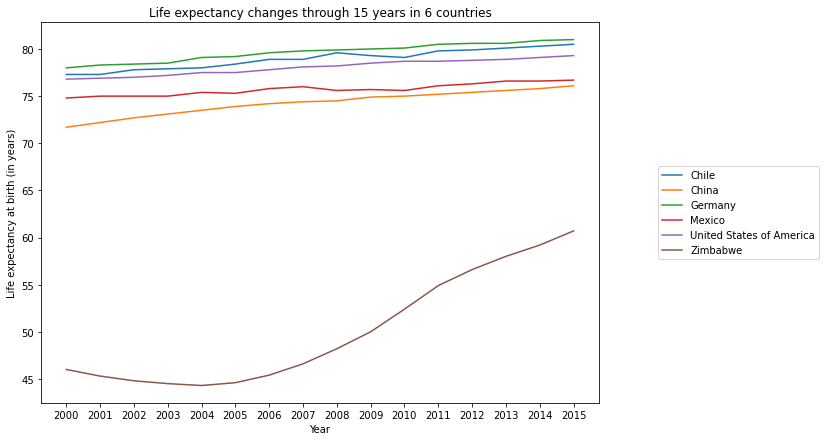

In [6]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.lineplot(data=data, x='year', y='life_expectancy', hue='country')
ax.legend(loc='center', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Year')
plt.ylabel('Life expectancy at birth (in years)')
plt.title('Life expectancy changes through 15 years in 6 countries')
years = data.year.unique()
plt.xticks(years)
plt.show()

We can see that life expectancy was rising through the years (2000 - 2015) in all six countries. However, in Chile, China, Germany, Mexico and USA life expectancy in 2000 was equal to around 75 years (from about 72 in China to about 78 in Germany) and it increased for about 2-3 years in each country. On the other hand, in Zimbabwe life expectancy meaningfully risied from about 45 years in the begining of the 2000s to above 60 years in 2015.

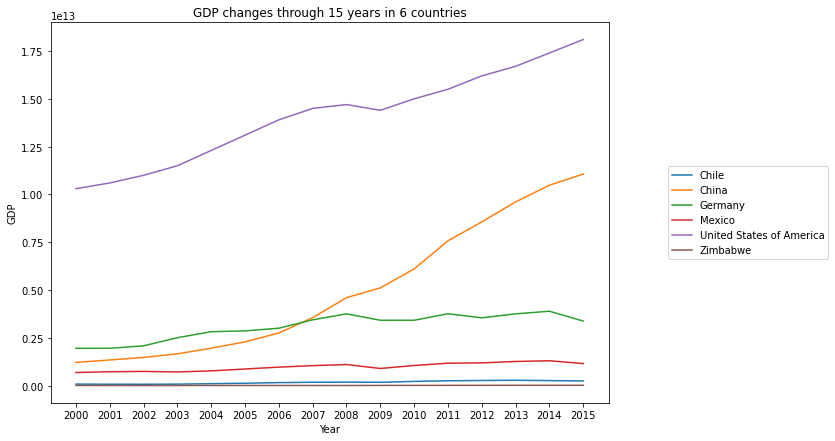

In [7]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.lineplot(data=data, x='year', y='gdp', hue='country')
ax.legend(loc='center', bbox_to_anchor=(1.25, 0.5))
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP changes through 15 years in 6 countries')
years = data.year.unique()
plt.xticks(years)
plt.show()

In [8]:
d = {'country':[], 'min':[], 'max':[], 'mean':[]}
for country in data.country.unique():
    d['country'].append(country)
    d['min'].append(f'{data[data.country==country].gdp.min():,}')
    d['max'].append(f'{data[data.country==country].gdp.max():,}')
    d['mean'].append(f'{data[data.country==country].gdp.mean():,}')
pd.DataFrame(data=d)

,country,min,max,mean
0,Chile,"69,736,811,435.0","278,384,000,000.0","169,788,845,015.3125"
1,China,"1,211,350,000,000.0","11,064,700,000,000.0","4,957,713,750,000.0"
2,Germany,"1,949,950,000,000.0","3,890,610,000,000.0","3,094,775,625,000.0"
3,Mexico,"683,648,000,000.0","1,298,460,000,000.0","976,650,625,000.0"
4,United States of America,"10,300,000,000,000.0","18,100,000,000,000.0","14,075,000,000,000.0"
5,Zimbabwe,"4,415,702,800.0","16,304,667,807.0","9,062,579,595.0625"


We can see that GDP was rising through the years (2000 - 2015) in USA and China, while in other countries the value of GDP was quite stable (a little increase in Germany). In addition, GDP in USA in the begining was few times larger than in other countries and almost doubled throuh 15 years (from 10 to 18 trillions). In China there was even more meaningful change about tenfold rise (from 1.2 to 11 trillions). Meanwhile in Chile GDP ranged from about 70 to about 280 billions and in Zimbabwe GDP rised four times (from 4.4 to 16.3 billions)

To sum up, there was a huge difference in GDP between countries like USA or Zimbabwe and Chile through all time.

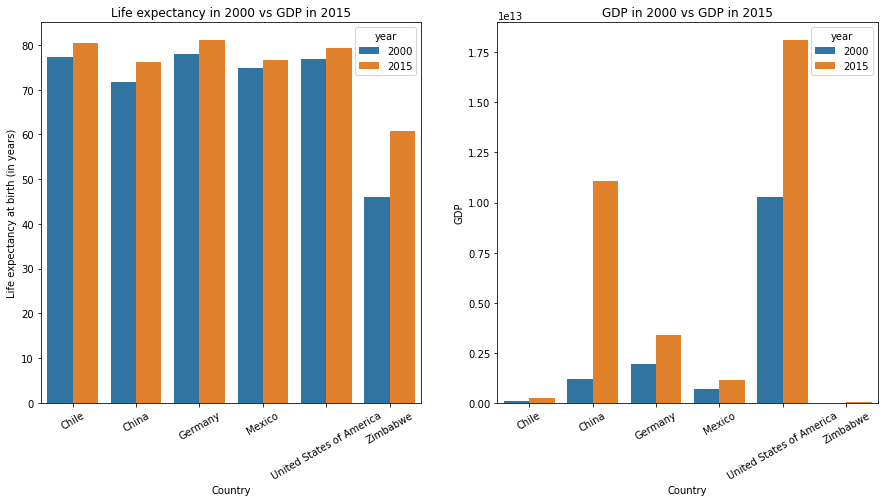

In [9]:
data_00_15 = data[(data.year==2000)|(data.year==2015)]

plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.barplot(data=data_00_15, x="country", y="life_expectancy", hue='year')
plt.xticks(rotation=30)
plt.xlabel('Country')
plt.ylabel('Life expectancy at birth (in years)')
plt.title('Life expectancy in 2000 vs GDP in 2015')

plt.subplot(1,2,2)
sns.barplot(data=data_00_15, x="country", y="gdp", hue='year')
plt.xticks(rotation=30)
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('GDP in 2000 vs GDP in 2015')

plt.show()

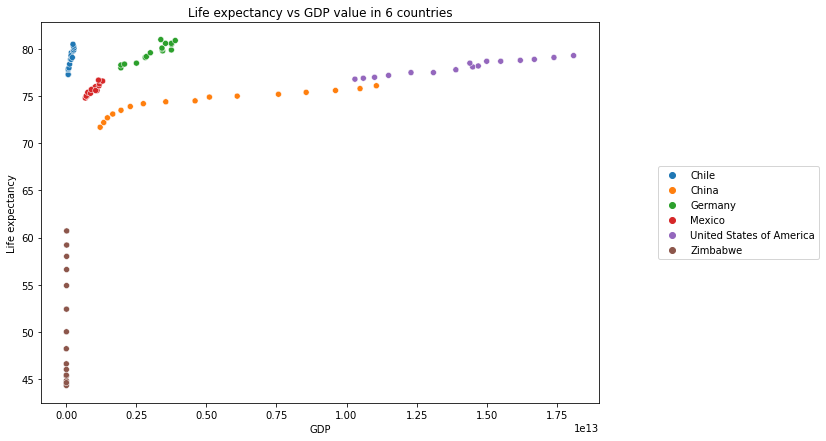

In [10]:
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.scatterplot(data=data, x="gdp", y="life_expectancy", hue='country')
ax.legend(loc='center', bbox_to_anchor=(1.25, 0.5))
plt.ylabel('Life expectancy')
plt.xlabel('GDP')
plt.title('Life expectancy vs GDP value in 6 countries')
plt.show()

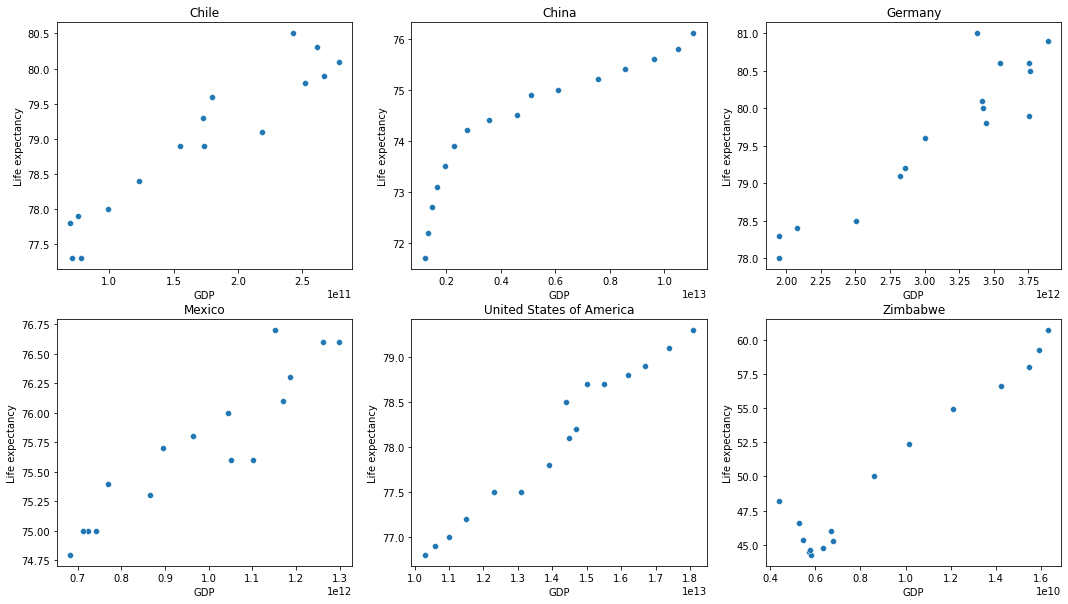

In [11]:
countries = data.country.unique().tolist()
plt.figure(figsize=(18,10))
for i in range(len(countries)):
    plt.subplot(2,3,i+1)
    data_contry = data[data.country==countries[i]]
    sns.scatterplot(data=data_contry, x="gdp", y="life_expectancy")
    plt.title(countries[i])
    plt.ylabel('Life expectancy')
    plt.xlabel('GDP')
plt.show()

We can see that through this 15 years, both life expectancy and GDP value rised in all coutries, but there were different changes depending on the region. Also, there was relationship between GDP value and life expectancy - the bigger GDP, the bigger life expectancy.